In [23]:
%pip install scikit-learn

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math

In [25]:
file_path = 'C:\\Users\\tom04\\OneDrive\\文件\\code\\BAD Project\\BAD-Project\\BAD-Project\\historical_data.csv'
data = pd.read_csv(file_path)

In [26]:
# Selecting relevant features and the target variable
X = data[['Holiday', 'Temperature', 'Rainfall']]
y = data['Demand']

In [27]:
# Convert 'Holiday' from boolean to int (True to 1, False to 0)
X['Holiday'] = X['Holiday'].astype(int)

C:\Users\tom04\AppData\Local\Temp\ipykernel_27544\3703725829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Holiday'] = X['Holiday'].astype(int)


In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=8)


In [29]:
regressor = KNeighborsRegressor(n_neighbors=25)
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

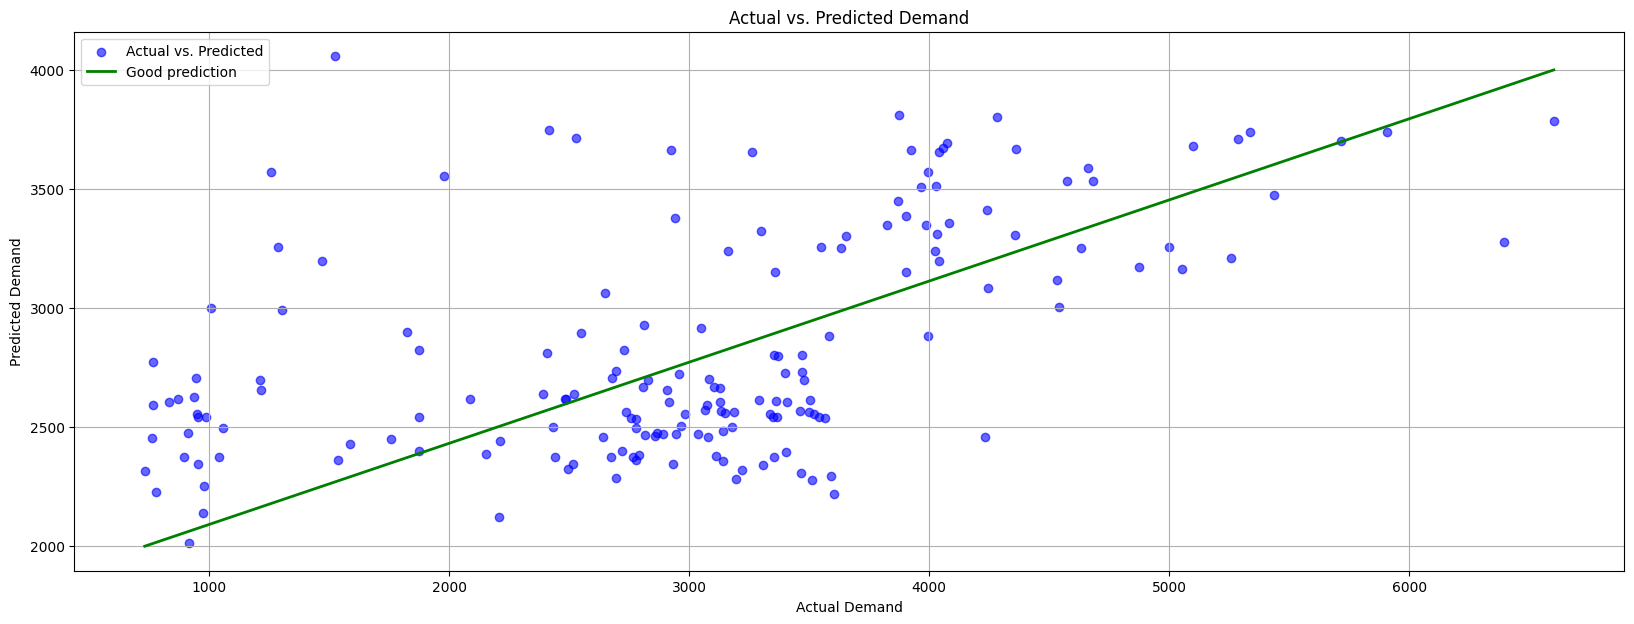

Regressor Score (R-squared): 0.24085629783615425


In [30]:

# Predict demand for the test set
predicted_test_demand = regressor.predict(X_test)

# Visualize the regression effect
plt.figure(figsize=(20, 7))

# Scatter plot of actual test data vs. predicted test data
plt.scatter(y_test, predicted_test_demand, color='blue', label='Actual vs. Predicted', alpha=0.6)

# Diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [2000,4000], linestyle='-', color='green', linewidth=2, label='Good prediction')

plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand')
plt.legend()
plt.grid(True)
plt.show()

# Display the actual test data


# Calculate the score of the regressor
score = regressor.score(X_test, y_test)
print("Regressor Score (R-squared):", score)

In [32]:
# Example input: [Holiday, Temperature, Rainfall]
# Let's say we want to predict the demand for a day that is not a holiday, 
# with a temperature of 20 degrees and rainfall of 10mm.
new_data = [[0,20,2.8]]  # Replace this with your new data

# Normalize and make a prediction using the trained model
predicted_demand = regressor.predict(new_data)  # Use regressor instead of best_knn
rounded_demand = math.floor(predicted_demand[0])

print( rounded_demand)

2401


c:\Users\tom04\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
